In [13]:
import pygad
import numpy as np
import time
# 1630 - max

items = ['zegar', 'pejzaz', 'portret', 'radio', 'laptop', 'lampka', 'sztucce', 'porcelana', 'figura', 'torebka', 'odkurzacz']
items_to_ints = {inx:item for inx, item in enumerate(items, start=0)}
price = [100, 300, 200, 40, 500, 70, 100, 250, 300, 280, 300]
weight = [7, 7, 6, 2, 5, 6, 1, 3, 10, 3, 15]


#definiujemy parametry chromosomu
#geny to liczby: 0 lub 1
gene_space = [0, 1]

#definiujemy funkcję fitness
def fitness_func(solution, solution_idx): # solution_idx - irrelevant
    suma_wartosci = np.sum(solution * price)
    suma_wag = np.sum(solution * weight)
    if suma_wag > 25:
        return 0
    else:
        return suma_wartosci


Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Fitness value of the best solution = 1630.0
Chosen items: ['pejzaz', 'portret', 'laptop', 'sztucce', 'porcelana', 'torebka']


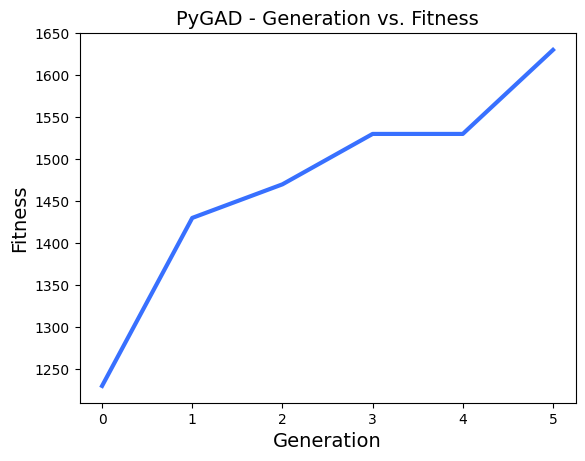

Number of generations passed is 5


In [63]:
fitness_function = fitness_func
# max_pokolen - ok. 100

#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 50
num_genes = len(items) 

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 30
num_generations = 100
keep_parents = 2

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w ilu punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 10 

#inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria=["reach_1600.0"])

#uruchomienie algorytmu
ga_instance.run()

#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

#tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
# solution = np.array(solution, dtype=int)
best_items = [items_to_ints[inx] for inx in range(11) if solution[inx] == 1]
print(f"Chosen items: {best_items}")

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()
print("Number of generations passed is {generations_completed}".format(generations_completed=ga_instance.generations_completed))

Average time: to find the solutio: 0.02348630428314209
Parameters of the best solution : [0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.]
Fitness value of the best solution = 1630.0
Chosen items: ['pejzaz', 'portret', 'laptop', 'sztucce', 'porcelana', 'torebka']


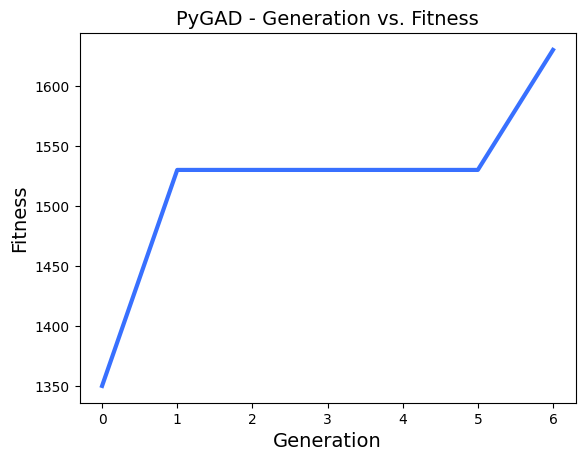

Number of generations passed is 6


In [56]:
fitness_function = fitness_func
# max_pokolen - ok. 100

#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 50
num_genes = len(items) 

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 20
num_generations = 100
keep_parents = 2

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w ilu punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 10 

times = []
for _ in range(10):
    start = time.time()
    #inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(gene_space=gene_space,
                        num_generations=num_generations,
                        num_parents_mating=num_parents_mating,
                        fitness_func=fitness_function,
                        sol_per_pop=sol_per_pop,
                        num_genes=num_genes,
                        parent_selection_type=parent_selection_type,
                        keep_parents=keep_parents,
                        crossover_type=crossover_type,
                        mutation_type=mutation_type,
                        mutation_percent_genes=mutation_percent_genes,
                        stop_criteria=["reach_1600.0"])

    #uruchomienie algorytmu
    ga_instance.run()
    end = time.time()
    times.append(end - start)
print(f"Average time: to find the solutio: {sum(times) / 10}")

#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

#tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
# solution = np.array(solution, dtype=int)
best_items = [items_to_ints[inx] for inx in range(11) if solution[inx] == 1]
print(f"Chosen items: {best_items}")

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()
print("Number of generations passed is {generations_completed}".format(generations_completed=ga_instance.generations_completed))